**Import required Libraries and Packages**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
path = "/content/drive/MyDrive/ford.csv"

**Read a csv file as pandas DataFrame**

In [7]:
df = pd.read_csv(path)

In [9]:
print(type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Check for missing values, data types of the columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [11]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(17964, 8)
number of rows =  17964
number of columns =  8


**Count the number of unique values present in the 'year' column**

In [12]:
print(df["year"].unique())
print(type(df["year"].unique()))
print(len(df["year"].unique()))

# print(df["year"].values)
print(df["year"].value_counts())

[2017 2018 2019 2015 2014 2016 2013 2020 2012 2008 2010 2009 2011 1998
 2007 2005 2006 2002 2003 1996 2004 2000]
<class 'numpy.ndarray'>
22
2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64


**Count the number of unique values present in the 'Model' column**

In [13]:
print(df["model"].value_counts())

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64


**Count the number of unique values present in the 'transmission' column**

In [14]:
print(df["transmission"].value_counts())

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64


**Count the number of unique values present in the 'Fuel Type' column**

In [15]:
print(df["fuelType"].value_counts())

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


**Created a Pie Chart for FORD**

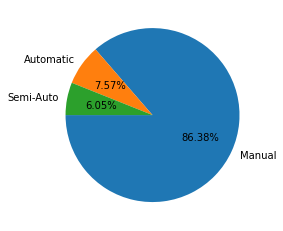

In [23]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

**Problems with Pie Chart**

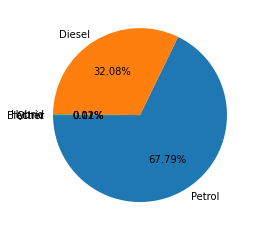

In [24]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

**Find the percentage of unique values present in the 'Fuel Type' column**

In [26]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())

display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Petrol,12177
Diesel,5762
Hybrid,22
Electric,2
Other,1


Index(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype='object')
Index(['fuelType'], dtype='object')


In [28]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,12177,67.79
1,Diesel,5762,32.08
2,Hybrid,22,0.12
3,Electric,2,0.01
4,Other,1,0.01


**Create a Barplot for the 'Fuel Type' column**

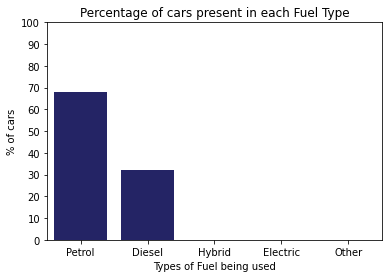

In [44]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="midnightblue",
            alpha=1)

plt.xlabel("Types of Fuel being used")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each Fuel Type")

plt.yticks(np.arange(0,101,10))

plt.show()

**Find the percentage of unique values present in the 'Transmission' column**

In [41]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,15517,86.38
1,Automatic,1360,7.57
2,Semi-Auto,1087,6.05


**Create a Barplot for the 'Transmission' column**

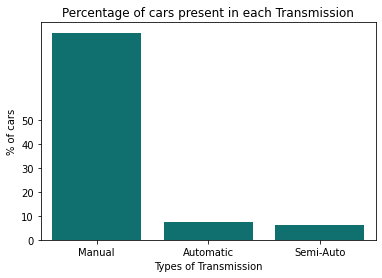

In [45]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="Teal",
            alpha=1)

plt.xlabel("Types of Transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each Transmission")

plt.yticks(np.arange(0,51,10))

# integer

plt.show()

In [46]:
np.arange(0,101,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])